In [1]:
# import libraries....
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create..


In [2]:
# Read in the data
df = pd.read_csv('movies.csv')
df.head()
# df.info()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Lets explore if there is missing data
colshavingmissingdata = []
for col in df.columns:
    if df[col].isnull().any() == True:
        #print(col)
        colshavingmissingdata.append(col)
# colshavingmissingdata


In [4]:
# for percent of missing data -> really not needed...

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col , pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# filling all the NaN values in df with the next values...
df1 = df.fillna(method = 'ffill')
df1.isna()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7666,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Datatypes of our columns 
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing data types of the columns...
def new_col(df, col_name , datatype = 'int64'):
    df[col_name] = df[col_name].astype(datatype)
    return df[col_name]

df1['budget'] = new_col(df1 , 'budget')
df1['gross'] = new_col(df1 , 'gross')
df1['runtime'] = new_col(df1 , 'runtime')
df1['votes'] = new_col(df1 , 'votes')

# df1.head()

In [8]:
# fixing the year and release year as it should be same for all the entries.....
# creating new column -> correct year
new = df1['released'].str.split(',' , n = 1 , expand = True)
df1['correctyear'] = new[1].astype(str).str[1:5]
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [9]:
# ordering data by gross..
df1 = df1.sort_values(by = ['gross'], inplace = False , ascending = False)


In [10]:
# showing the whole dataframe as an output...
pd.set_option('display.max_rows', None)

In [11]:
# Drop any duplicates..
df1['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [12]:
# budget high correlation
# company high correlation
# votes high correlation
# scores high correlation

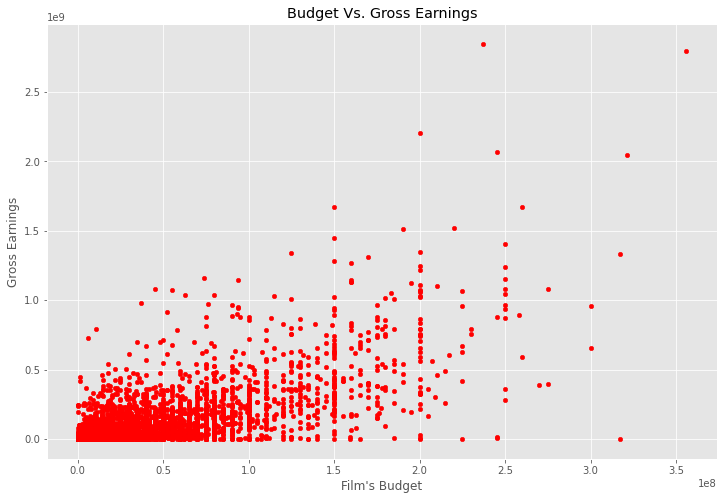

In [13]:
# Scatter plot with budget vs gross
df1.plot.scatter(x = 'budget' , y = 'gross' , c = 'r')
plt.title('Budget Vs. Gross Earnings')
plt.xlabel("Film's Budget")
plt.ylabel('Gross Earnings')
plt.show()

In [14]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


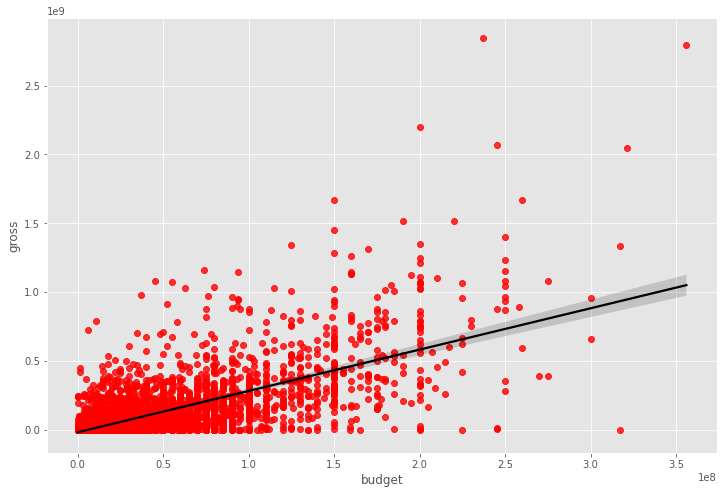

In [15]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget' , y = 'gross', data = df1, scatter_kws={'color':'red'} , line_kws={'color':'black'})
plt.show()

In [16]:
# Let's start looking at correlation
df1.corr() # by default -> pearson-correlation, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098098,0.222427,0.334314,0.261550,0.120694
score,0.098098,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.222427,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399116,0.309140,0.263424,0.245443,1.000000


In [17]:
df1.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067724,0.330410,0.239054,0.206176,0.097144
score,0.067724,1.000000,0.299756,0.023015,0.088740,0.283102
votes,0.330410,0.299756,1.000000,0.359133,0.549760,0.198226
budget,0.239054,0.023015,0.359133,1.000000,0.423210,0.194368
gross,0.206176,0.088740,0.549760,0.423210,1.000000,0.173083
runtime,0.097144,0.283102,0.198226,0.194368,0.173083,1.000000


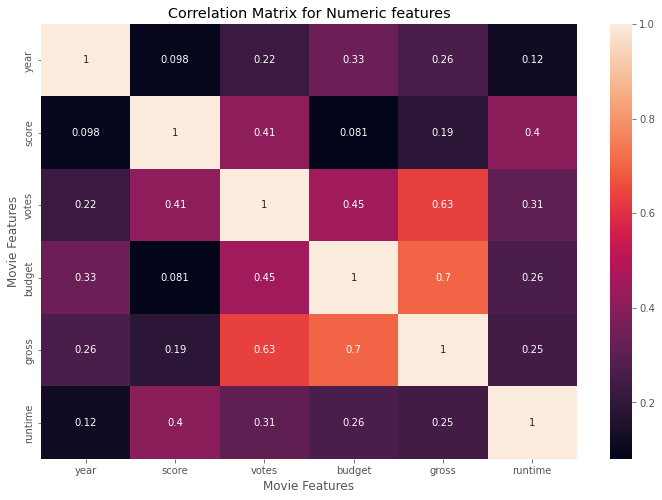

In [18]:
# There is a high correlation b/w budget and gross
correlation_matrix= df1.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()

# correlation_matrix= df1.corr(method = 'kendall')
# sns.heatmap(correlation_matrix, annot = True)
# plt.title('Correlation Matrix for Numeric features')
# plt.xlabel("Movie Features")
# plt.ylabel('Movie Features')
# plt.show()

In [19]:
# looks at company as it is not numeric...
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 5445 to 3203
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7668 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7668 non-null   object 
 5   score        7668 non-null   float64
 6   votes        7668 non-null   int64  
 7   director     7668 non-null   object 
 8   writer       7668 non-null   object 
 9   star         7668 non-null   object 
 10  country      7668 non-null   object 
 11  budget       7668 non-null   int64  
 12  gross        7668 non-null   int64  
 13  company      7668 non-null   object 
 14  runtime      7668 non-null   int64  
 15  correctyear  7668 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1018.4+ KB


In [20]:
# we're gonna assign a number to the corresponding company name. But it's better to convert all into numeric at the same time...
df1_numerized = df1
for col_name in df1_numerized.columns:
    if df1_numerized[col_name].dtype == 'object':
       df1_numerized[col_name] =  df1_numerized[col_name].astype('category')
       df1_numerized[col_name] = df1_numerized[col_name].cat.codes

df1_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38


In [21]:
# ordering data by gross..
df = df.fillna(method = 'ffill')
df = df.sort_values(by = ['gross'], inplace = False , ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


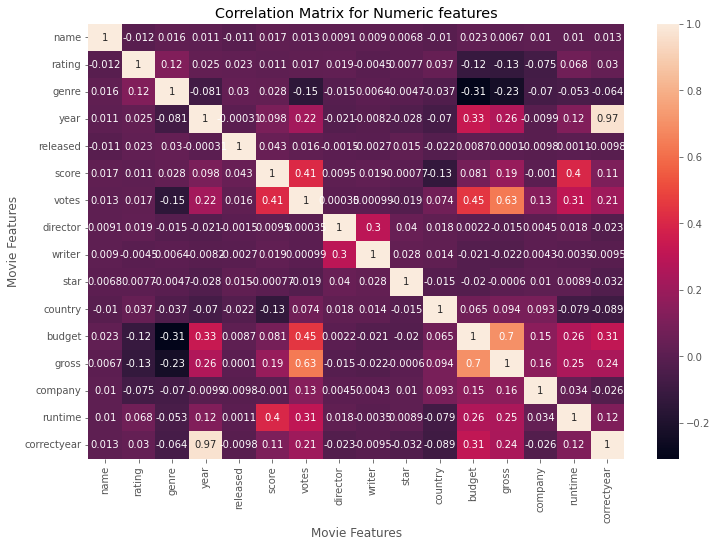

In [22]:
# now we can find the correlation between all the columns as well since we have assigned a numeric value to all the object dtype columns....
correlation_matrix= df1_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.show()

In [23]:
pd.set_option('display.max_rows' , None)

In [24]:
# Now we'll organize the highest correlations in the top most of correlation table...
# We're gonna use something called unstacking...
corr_matrix = df1_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.011776
             genre          0.016355
             year           0.011453
             released      -0.010758
             score          0.017237
             votes          0.013038
             director       0.009079
             writer         0.009033
             star           0.006820
             country       -0.010127
             budget         0.022882
             gross          0.006747
             company        0.009980
             runtime        0.010448
             correctyear    0.012603
rating       name          -0.011776
             rating         1.000000
             genre          0.116837
             year           0.025051
             released       0.022667
             score          0.011389
             votes          0.016909
             director       0.018842
             writer        -0.004470
             star           0.007728
             country        0.036900
 

In [25]:
# Sorting the unstacked correlation matrix..
sorted_corr_pair = corr_pairs.sort_values(ascending= False)
sorted_corr_pair

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
correctyear  correctyear    1.000000
year         correctyear    0.967588
correctyear  year           0.967588
budget       gross          0.701819
gross        budget         0.701819
votes        gross          0.632341
gross        votes          0.632341
budget       votes          0.449422
votes        budget         0.449422
score        votes          0.409064
votes        score          0.409064
runtime      score          0.399116
s

In [26]:
# Extracting out only the highly correlated pairs..
high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs


name         name           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
             correctyear    0.967588
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
             gross          0.632341
director     director       1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          0.701819
gross        votes          0.632341
             budget         0.701819
             gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
correctyear  year           0.967588
             correctyear    1.000000
dtype: float64

In [27]:
# hence, Budget and gross have the highest correlation which we can really use in further steps of data analysis...
# Company has lower correlation, we're wrong...